In [43]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 42
pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_csv('datalake/refined/df_refined.csv')

In [20]:
df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0,0,0,0,0,0,1,0.378641,2,4,2,3,2
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0,0,0,0,0,0,0,0.407767,2,4,2,0,1
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0,0,0,0,0,0,0,0.300971,2,5,1,1,1
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0,0,0,0,0,0,0,0.116505,2,5,0,0,1
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0,0,0,0,0,0,0,0.145631,4,3,1,0,3


### Data transformation

In [17]:
continuos_columns = ['income','kidhome', 'teenhome', 
                     'recency', 'mntwines', 'numwebvisitsmonth',
                     'mntfruits', 'mntmeatproducts', 'mntfishproducts',
                     'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
                     'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
                     'age']

categorical_columns = ['acceptedcmp1', 'acceptedcmp2','acceptedcmp3', 
                       'acceptedcmp4', 'acceptedcmp5', 'education_encoded',
                       'response', 'recency_encoded', 'marital_status_encoded',
                       'client_days_encoded', 'age_encoded']

In [18]:
scaler = preprocessing.MinMaxScaler()


for col in continuos_columns:
    df[col] = scaler.fit_transform(df[[col]])

In [19]:
df.dtypes

income                    float64
kidhome                   float64
teenhome                  float64
recency                   float64
mntwines                  float64
mntfruits                 float64
mntmeatproducts           float64
mntfishproducts           float64
mntsweetproducts          float64
mntgoldprods              float64
numdealspurchases         float64
numwebpurchases           float64
numcatalogpurchases       float64
numstorepurchases         float64
numwebvisitsmonth         float64
acceptedcmp3                int64
acceptedcmp4                int64
acceptedcmp5                int64
acceptedcmp1                int64
acceptedcmp2                int64
complain                    int64
response                    int64
age                       float64
education_encoded           int64
marital_status_encoded      int64
age_encoded                 int64
client_days_encoded         int64
recency_encoded             int64
dtype: object

### Split train and test

In [28]:
y = df[['response']].values
X = df.drop('response', 1).values

/tmp/ipykernel_814654/3837332571.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('response', 1).values


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.30, random_state=seed)

### Models

In [62]:
logist_regression = LogisticRegression(random_state = seed, solver='liblinear')
logist_regression.fit(X_train, y_train)
y_predicted = logist_regression.predict(X_test)
print(classification_report(y_test, y_predicted));
joblib.dump(logist_regression, 'datalake/model/logist_regression.joblib');

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       577
           1       0.68      0.34      0.45        95

    accuracy                           0.88       672
   macro avg       0.79      0.66      0.69       672
weighted avg       0.87      0.88      0.87       672



/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


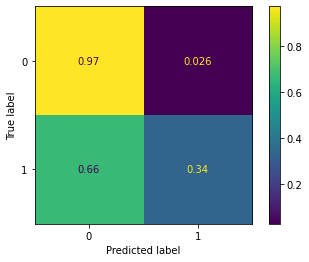

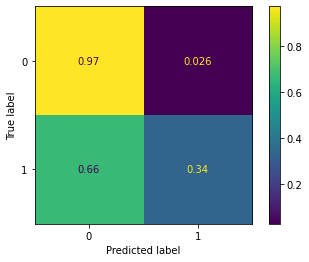

In [60]:
plot_confusion_matrix(logist_regression, X_test, y_test, normalize='true').plot();

In [66]:
df.groupby('response')['income'].count()

response
0    1906
1     334
Name: income, dtype: int64

In [73]:
import collections

counter=collections.Counter(y_predicted)

print(counter)

Counter({0: 625, 1: 47})
